<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/UN_decade_banner.png' align='right' width='100%'/>

<a href="../../../../Index.ipynb" target="_blank"><< Index</a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2025 European Union <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT)

<html>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies"><img src="https://img.shields.io/badge/open-EUMETLAB-E67E22.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://user.eumetsat.int/data/themes/marine"><img src="https://img.shields.io/badge/open-USER PORTAL-154360.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fapplications%2Focean-case-studies/HEAD?labpath=Case_studies%2FUNOD%2FCh01%2FSargassum%2FSargassum_AFAI.ipynb"><img src="https://mybinder.org/badge_logo.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://jupyterhub.prod.wekeo2.eu/hub/user-redirect/lab/tree/public/wekeo4oceans/ocean-case-studies/Case_studies/UNOD/Ch01/Sargassum/Sargassum_AFAI.ipynb"><img src="https://img.shields.io/badge/launch-WEKEO-1a4696.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://code.insula.destine.eu/hub/"><img src="https://img.shields.io/badge/launch-DestinE-f43fd3.svg"></a></div></div>
</html>

<div class="alert alert-block alert-success">
<h3>Ocean colour applications</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>

This notebook has the following prerequisites:
- **<a href="https://my.wekeo.eu/user-registration" target="_blank">A WEkEO account</a>** to work with Copernicus Sentinel-3 OLCI marine data from EUMETSAT Data Store
    
There are no prerequisite notebooks for this module, but you may wish to look at the following notebooks on using Sentinel-3 OLCI data; <br>
- **<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/sensors/learn-olci" target="_blank">Learn OLCI (EUMETSAT Gitlab)</a>**

</div>
<hr>

# Monitoring Sargassum in the Caribbean
<font color="#138D75">**UN Ocean Decade Challenge 1: Understand and beat marine pollution**</font>


### Data used

| Dataset | EUMETSAT collection ID | EUMETSAT collection<br>description | WEkEO dataset ID | WEkEO description | Copernicus Marine<br>Data Store product ID | Copernicus Marine<br>product description |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:-----------------:|:-----------------:|:-----------------:|
| Sentinel-3 OLCI level-1b full resolution | EO:EUM:DAT:0409 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:SENTINEL-3:OL_1_EFR___NTC" target="_blank">Description</a> | EO:EUM:DAT:SENTINEL-3:OL_1_EFR___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3AOL_1_EFR___" target="_blank">Description</a> | - | - |
| Sentinel-3 OLCI level-2 full resolution | EO:EUM:DAT:0407 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:SENTINEL-3:OL_2_WFR___NTC" target="_blank">Description</a> | EO:EUM:DAT:SENTINEL-3:OL_2_WFR___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3AOL_2_WFR___" target="_blank">Description</a> | - | - |

### Learning outcomes

At the end of this notebook you will know how to ;

* access Sentinel-3 OLCI ocean colour data via WEkEO
* process Sentinel-3 OLCI data sets with the ESA SNAP package using the WEkEO `eocanvas` serverless function architecture

### Outline

#### References

https://www.sciencedirect.com/science/article/pii/S0034425724002414?ref=pdf_download&fr=RR-2&rr=9508a076adf8f3b8

<div class="alert alert-info" role="alert">

## <a id='TOCTOP'></a>Contents

</div>

 1. [Step 1: Setting up our analysis](#section1)
 1. [Step 2: Selecting our data using the WEkEO harmonised data access (HDA) adaptor](#section2)
 1. [Step 3: Processing Copernicus Sentinel-3 OLCI data using WEkEO `eocanvas` serverless functions](#section3)
 1. [Step 4: Calculating and plotting AFAI](#section4)
 1. [Step 5: Conclusions](#section5)

<hr>

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Setting up our analysis
[Back to top](#TOCTOP)

</div>

In this section we will set up all the parameters we need to run our notebook.

We will begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-colour-applications/-/blob/main/README.md?ref_type=heads" target="_blank">README</a>**.

**Important: If you are running on WEkEO, you should ensure that you have selected the "*wekeolab*" environment/ipykernel using the dropdown menu on the top right of the screen.**

In [113]:
import eumartools                      # a EUMETSAT library that support working with Sentinel-3 products
import os                              # a library that allows us access to basic operating system commands
import glob                            # a library that helps us search for files
import datetime                        # a library that allows us to work with dates and times
import xarray as xr                    # a library that helps us work efficiently with multi-dimensional arrays
import matplotlib.pyplot as plt        # a library the provides plotting capability
import numpy as np                     # a library that lets us work with arrays; we import this with a new name "np"
from pathlib import Path               # a library that helps construct system path objects
import getpass                         # a library to help us enter passwords
import hda                             # a library that supports WEkEO harmonised data access 
import cartopy                         # a library that supports mapping and projection
import cartopy.crs as ccrs             # a library that supports mapping and projection
import warnings                        # a library that supports managing warning messages
warnings.filterwarnings("ignore")

Lets also now add the eocanvas package to our environent. The cell below will install eocanvas if it is not already in the Python environment.

In [2]:
try:
    from eocanvas.api import Input, Config, ConfigOption # the eocanvas api
except:
    %pip install eocanvas
    from eocanvas.api import Input, Config, ConfigOption # the eocanvas api

from eocanvas.snap.graph import Graph                # the part of the eocanvas library for working with SNAP graphs
from eocanvas.snap import Operator                   # the part of the eocanvas library for defining SNAP graphs nodes
from eocanvas.processes import SnapProcess           # the part of the eocanvas library for defining SNAP processes

All of our dependencies are now installed.

In the next section of the notebook we will define all the parameters that we need to select, process and download level-1b and level-2 OLCI products, from which we will process our single-sensor chlorophyll products. To find our data of interest, we need to define:

* our region of interest (ROI), which we will also need as a well known text (WKT) format polygon
* the time period over which we want to find data (we'll be looking over a period where we know a bloom occurred).

Lets set these parameters, starting with a square box that we can turn into a WKT polygon for searching.

*Note: our default example is for the Baltic sea in mid-2022, but you can adapt this for other regions and times as you like.*

In [3]:
# defining our search times
start_L2 = datetime.datetime(2025, 4, 14, 14, 5, 11)
end_L2 = datetime.datetime(2025, 4, 14, 14, 8, 11)

Now let us set our `collectionID`s, the references for each collection in the WEkEO catalog (for example; `EO:EUM:DAT:SENTINEL-3:OL_1_EFR___`). These can be found in the <a href="https://wekeo.copernicus.eu/data?view=catalogue">WEkEO Data Catalog</a>. We will store these in a Python dictionary, as follows...

In [4]:
data_sources = {
               "L1B" : {"collectionID" : "EO:EUM:DAT:SENTINEL-3:OL_1_EFR___"}, # this is the OLCI level-1b collection ID, which contains top of atmosphere radiances
               "L2"  : {"collectionID" : "EO:EUM:DAT:SENTINEL-3:OL_2_WFR___"}, # this is the OLCI level-2 collection ID, which contains atmospherically corrected reflectances
               }

Now, lets set a timeliness parameter so that we can select on non-time critical (NT) scenes, which are of a higher quality than near real time data. We will also define our satellites, to include only Sentinel-3B at this stage.

In [5]:
timeliness = "NT"
satellite = "Sentinel-3B"

Finally, lets define a download directory, where we can download our products to and set a couple of switches that control if we will download and process new data, or use existing data.

In [6]:
download_dir = os.path.join(os.getcwd(), "products")
os.makedirs(download_dir, exist_ok=True)

# set a switch to process and download new data if True, or use existing data if False
process_L1_L2_data = True

Now we have set our parameters, we can proceed with our workflow. If you wish to adapt the notebook to focus on a different region or time, you can do so by updating the settings above.

<div class="alert alert-warning" role="alert">

## <a id='section99'></a>Defining functions
[Back to top](#TOCTOP)

</div>

#### Defining a quick function to supporting plotting

Before we move on to our analysis, we are going to define a quick function for use later on. We define functions when we have some code that we want to use repeatedly later on. In this section we define a quick functions that we will use to aid plotting. You don't need to worry about how this function works, and so it is hidden by default. You can click on the "+1 cell hidden" box below if you want to see it.

In [114]:
def embellish_plot(m):
    """Quick function to embellish plots with gridlines and labels

    Args:
        m (axis): the axis to plot into
    Returns:
        None
    """
    # Embellish with gridlines
    m.add_feature(cartopy.feature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='k', facecolor='#546d51', linewidth=0.5), zorder=500)
    g1 = m.gridlines(draw_labels = True, linestyle='--', linewidth=0.5, zorder=1000)
    g1.top_labels = g1.right_labels = False
    g1.xlabel_style = g1.ylabel_style = {'color': '0.5'}

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Selecting our data using the WEkEO harmonised data access (HDA) adaptor
[Back to top](#TOCTOP)

</div>

<div class="alert alert-block alert-success">

### Accessing data using the WEkEO HDA adaptor

Downloading from WEkEO harmonised data access (HDA) API is facilitated by a data access client. If you are currently working on the WEkEO JupyterHub, this client will already be installed. Otherwise, if you have followed the installation guidelines in the yml file provided with this repository, you will also have the client installed. If not, you are welcome to view the <a href="https://github.com/ecmwf/hda" target="_blank">source code</a> for more information and further instructions.

In order to allow us to download data using the WEkEO HDA API, we need to provide our credentials. To do this, we need to create a file called `.hdarc` in our home directory. For most computer systems the home directory can be found at the path \user\username, /users/username, or /home/username depending on your operating system. In this file we need to add the following information exactly as follows;

`user:<your_user_name>`<br>
`password:<your_password>`

You must replace `<your_user_name>` and `<your_password>` with the information from your WEkEO account (if you don't have one yet, please register at <a href="https://www.wekeo.eu/" target="_blank">https://www.wekeo.eu/</a>. Once you have entered these credentials in the file, the `hda` client will automatically read in the credentials from the file when you use it. 

The cell below will set up the required authentication file for you once you have your details ready.

*Note: take care not to share your user name and password*

</div>

In [ ]:
# set credentials file
wekeo_credentials_file = Path(Path.home() / '.hdarc')

if not os.path.exists(wekeo_credentials_file):
    # creating authentication file
    user_name = input('Enter your user name: ')
    user_pword = getpass.getpass('Enter your password: ')
    try:
        os.makedirs(os.path.dirname(wekeo_credentials_file), exist_ok=True)
        with open(wekeo_credentials_file, "w") as f:
            f.write(f'password: {user_pword}\nuser: {user_name}')
    except:
        pass

Now that we have our credentials set up we can set-up and instance of the HDA client, as below;

In [ ]:
c = hda.Client()

Now, we can loop through our data sources dictionary, using the search parameters we defined above to find the matching products

In [ ]:
for data_source in data_sources:

    # need to check on auth here
    query = {
            "dataset_id": data_sources[data_source]["collectionID"],
            "dtstart"   : start_L2.strftime("%Y-%m-%dT%H:%M:%S.000Z"),
            "dtend"     : end_L2.strftime("%Y-%m-%dT%H:%M:%S.000Z"),
            "timeliness": timeliness,
            "bbox"      : bbox,
            "sat"       : satellite
            }
    
    results = c.search(query)
    data_sources[data_source]["results"] = results
    data_sources[data_source]["urls"] = results.get_download_urls()
    data_sources[data_source]["product_names"] = [results.results[i]["id"] for i in range(len(results))]

    print(f"Found: {len(results)} products for {data_sources[data_source]['collectionID']}")

<div class="alert alert-info" role="alert">

## <a id='section3'></a>3. Processing Copernicus Sentinel-3 OLCI data using WEkEO `eocanvas` serverless functions
[Back to top](#TOCTOP)

</div>

Should we wish, we could now directly download the entirety of the level-1b and level-2 products that come from our search, using the following command:

`data_sources["L1B"]["results"].download(download_dir=download_dir)`

or

`data_sources["L2"]["results"].download(download_dir=download_dir)`

However, OLCI level-1b and level-2 scenes are typically quite large, ~900 Mb and ~500 Mb in size, respectively. Furthermore, these are not yet fully processed for our needs and so it would be more efficient to process these results remotely, subsequently downloading only the final, much smaller products. This is what we will do.

We are going to process our products using a <a href="https://step.esa.int/main/toolboxes/snap/">ESA SNAP</a> software package. Access to this package is managed through the WEkEO `eocanvas` python library, which allows us to run SNAP as a serverless function. However, we need to provide instructions to SNAP in order to define the processes we want to perform. We achieve this by providing `eocanvas` an XML format "Graph" that SNAP can ingest using its command-line based Graph Processing Tool (GPT). Lets look at these graphs and then set-up our `eocanvas` process.

We have included two example graphs in the `SNAP_graphs` folder, one for L2 processing, which we will focus on, and one for L1 processing. Lets load these into our `data_sources` dictionary using the `Graph` method from `eocanvas`.

In [ ]:
data_sources["L1B"]["graph"] = Graph.from_uri(os.path.join(os.getcwd(), "SNAP_graphs", "SNAP_GPT_graph_OLCI_L1B_subset_Rrc.xml"))
data_sources["L2"]["graph"] = Graph.from_uri(os.path.join(os.getcwd(), "SNAP_graphs", "SNAP_GPT_graph_OLCI_L2_subset_flags.xml"))

Lets take a look at one of the graphs...

In [ ]:
# show it
data_sources["L1B"]["graph"].nice_view()

We can see that a number of steps are defined, each contained within a single "Node". We have following nodes:

* Read - where we read our input product
* Subset - where we subset out input product
* Rayleigh Correction - where we Rayleigh correct our product
* Write - where we output for final product

*Note: you can see that in the L2 product we subset not only by our region of interest, but also by bands, to make the resulting product smaller*

In [ ]:
if process_L1_L2_data:
    output_files = []
    for data_source in data_sources:
        for url, product_name in zip(data_sources[data_source]["urls"], data_sources[data_source]["product_names"]):
    
            inputs = Input(key="img1", url=url)
            config = Config(key="img1", options=ConfigOption(uncompress=True, sub_path="xfdumanifest.xml"))
            process = SnapProcess(snap_graph=data_sources[data_source]["graph"], eo_config=config, eo_input=inputs)
            process.prepare_inputs()
    
            job = process.submit()
            process.run(job, download_dir=download_dir)
        
            # rename output  
            downloaded_file = os.path.join(download_dir, os.path.basename(job.results[0].title))
            output_file = os.path.join(download_dir, product_name.replace(".SEN3", "_eocanvas_processed.nc"))
            output_files.append(output_file)
            os.rename(downloaded_file, output_file)
else:
    output_files = ["products/S3B_OL_1_EFR____20250414T140511_20250414T140811_20250415T164847_0179_105_224_2700_MAR_O_NT_004_eocanvas_processed.nc",
                    "products/S3B_OL_2_WFR____20250414T140511_20250414T140811_20250415T211005_0179_105_224_2700_MAR_O_NT_003_eocanvas_processed.nc"]

You should now be able to look in the "products" folder in the same directory as this notebook and find two processed scenes. Our `eocanvas` processing is complete.

<div class="alert alert-info" role="alert">

## <a id='section4'></a>4. Calculating and plotting the Alternatve Floating Algal Index
[Back to top](#TOCTOP)

</div>

In [67]:
ds = xr.open_dataset(output_files[0])

mask = eumartools.flag_mask(output_files[1],
                     'WQSF_lsb', ['LAND', 'CLOUD', 'CLOUD_AMBIGUOUS', 'CLOUD_MARGIN']).astype(float)
mask[mask == 1.0] = np.nan
mask[np.isfinite(mask)] = 1.0

In [68]:
AFAI = ds["rBRR_12"] - (ds["rBRR_08"] + (ds["rBRR_17"] - ds["rBRR_08"]) * (754 - 665)/(865 - 665))    

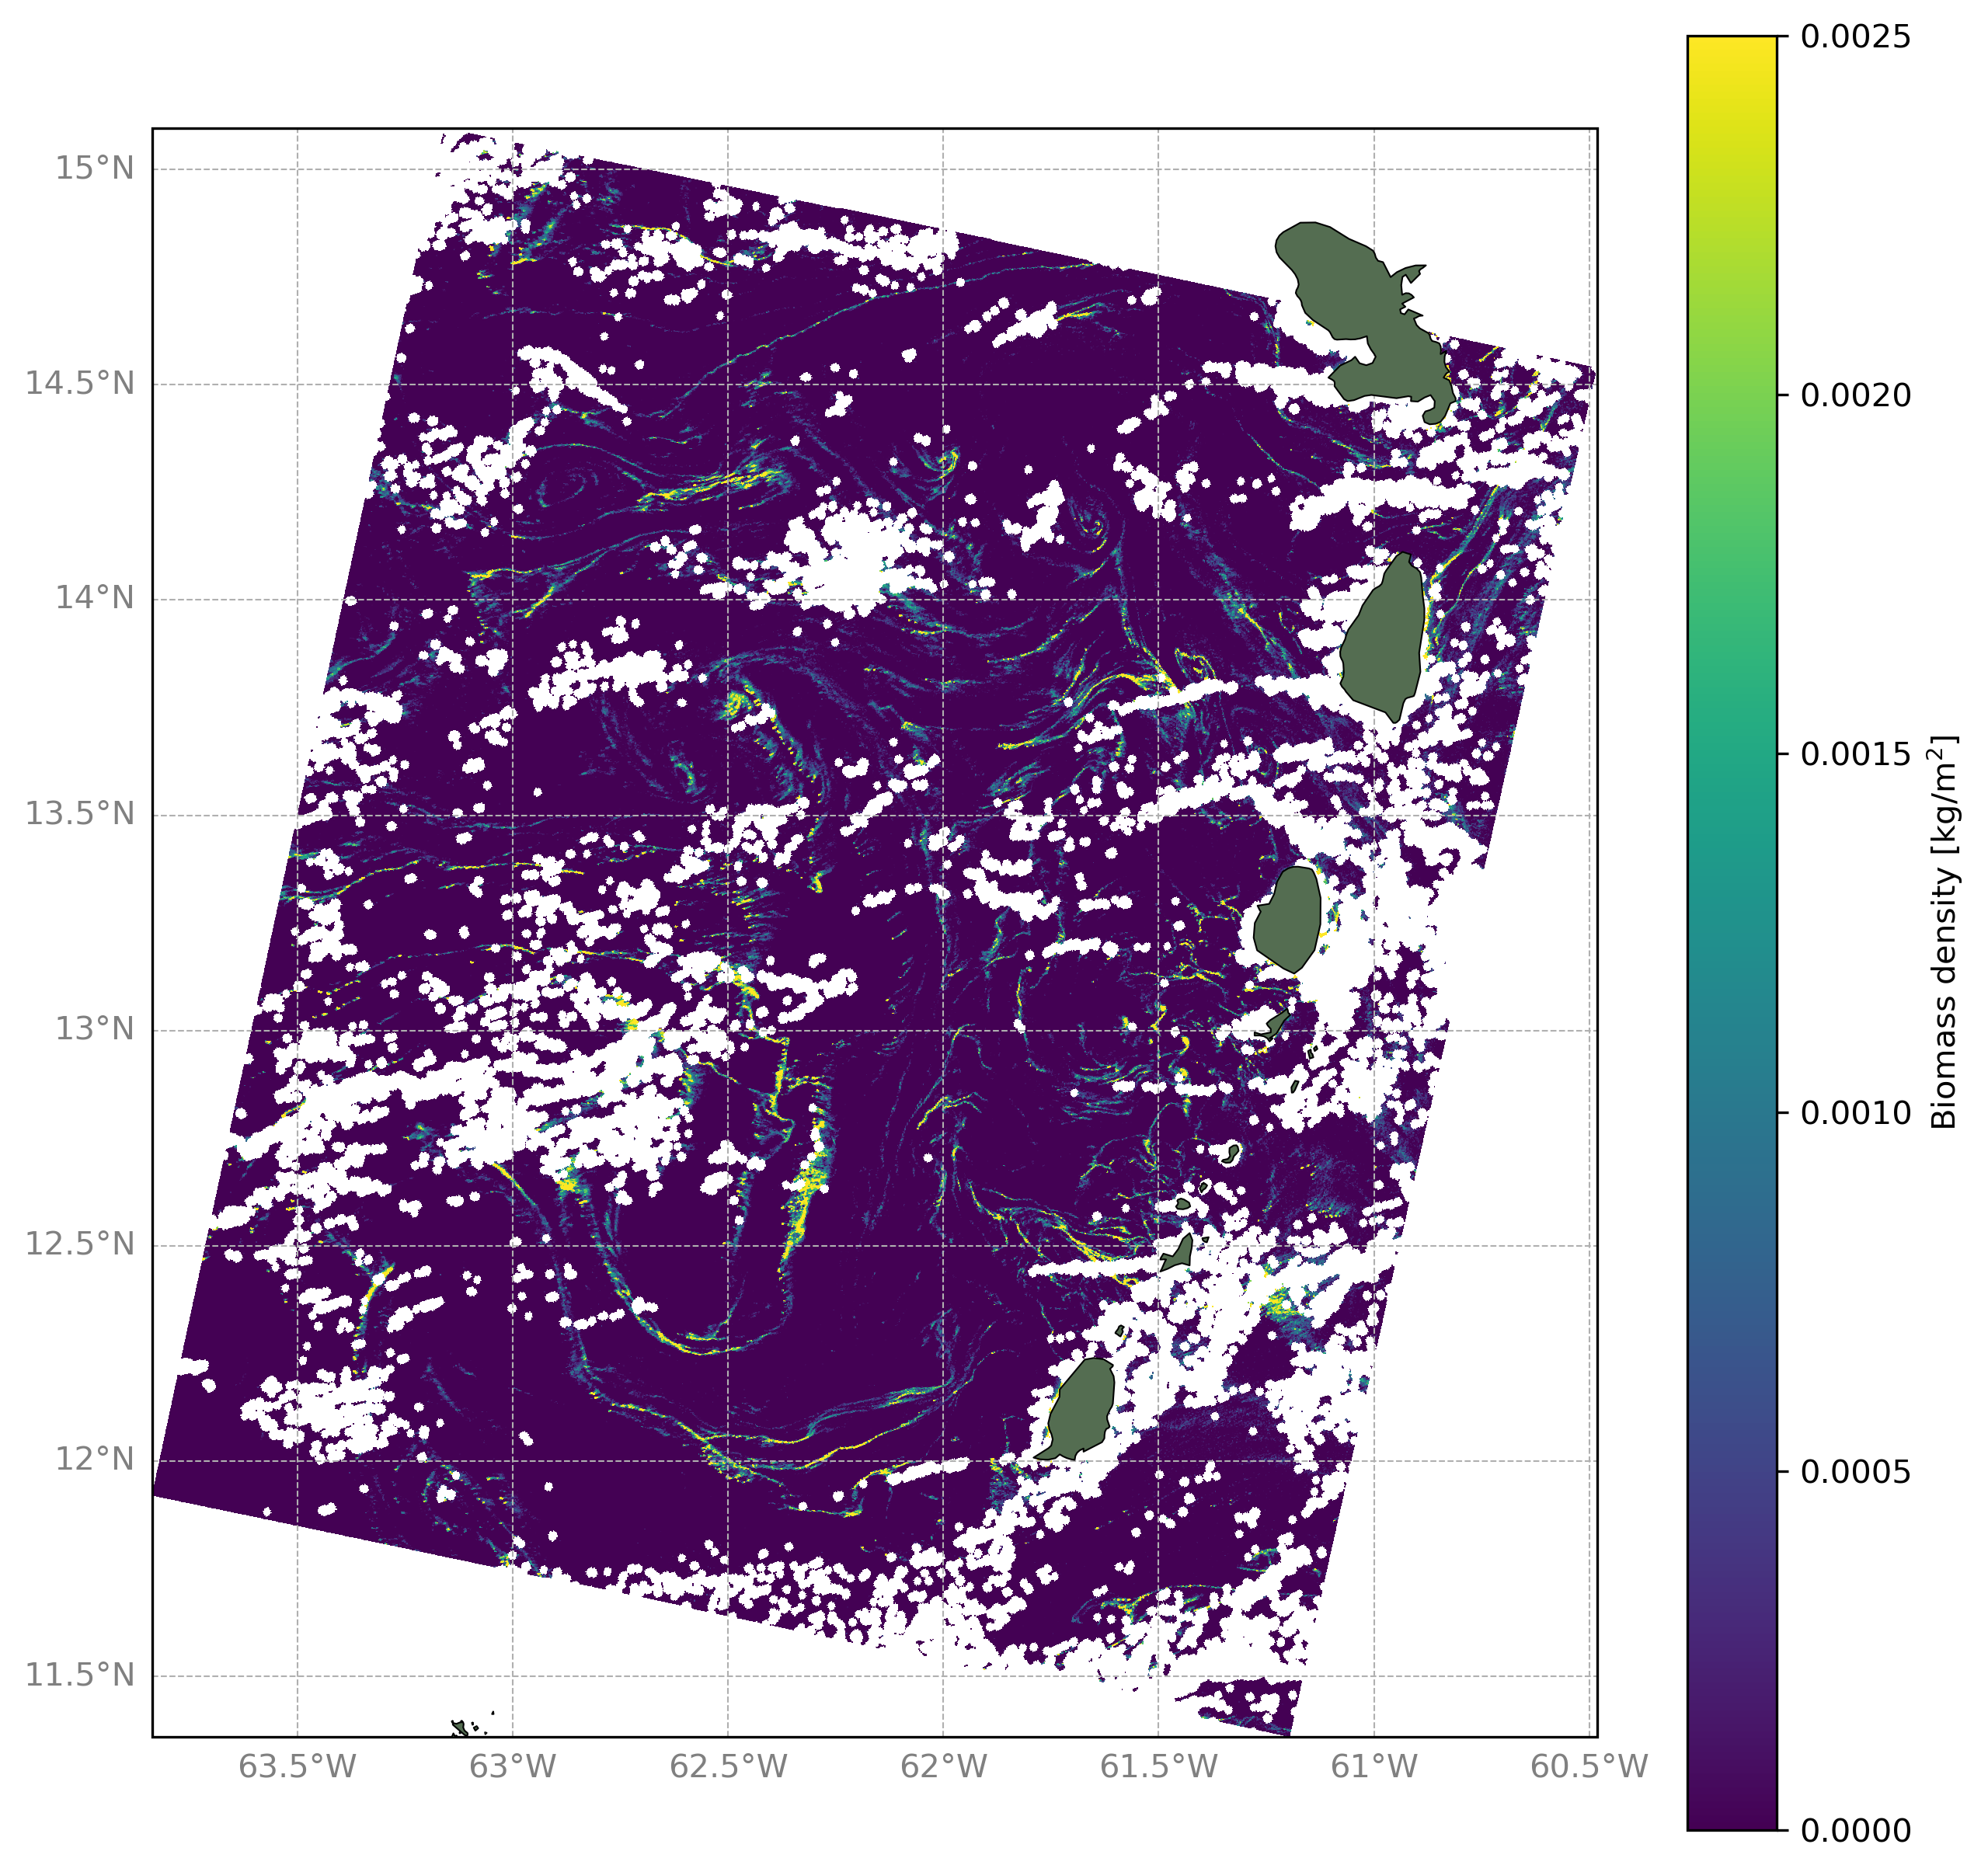

In [116]:
fig, m = plt.subplots(1, 1, figsize=(10, 10), dpi=300, subplot_kw={"projection": ccrs.PlateCarree()})
p1 = m.pcolormesh(ds["lon"], ds["lat"], AFAI*mask, vmin=0.0, vmax=0.0025, transform=ccrs.PlateCarree())
embellish_plot(m)
plt.colorbar(p1, label='Biomass density [kg/m$^{2}$]')
plt.savefig("Figure3.png")

<div class="alert alert-info" role="alert">

## <a id='section5'></a>5. Conclusions
[Back to top](#TOCTOP)

</div>

In this notebook we have seen that satellite data is capable of providing a detailed view of cyanobacteria bloom events. Modern sensors such as the OLCI sensors aboard the Sentinel-3 satellites can be exploited, thanks to their unique spectral bands, to develop specific algorithms for detection of blooms. However, these using this data may require pre-processing, which can be achieved using the serverless functions available in the `eocanvas` WEkEO package.

Longer time series of ocean colour data are being developed to support the assessment of the role of blooms in eutrophication trends in regions such as the Baltic sea. As the time series of OLCI data lengthens, and new opportunities from hyperspectral missions are realised, further opportunities will arise to expand this work.

### Suggested next steps

To further develop your skills and knowledge, and expand the application of this notebook you could try:
* Adapting the region of interest to compare various chlorophyll products at level-2 and level-3.



<hr>
<a href="../../../Index.ipynb" target="_blank"><< Index</a>
<hr>

<a href="https://gitlab.eumetsat.int/eumetlab/ocean" target="_blank">View on GitLab</a> | <a href="https://training.eumetsat.int/" target="_blank">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int target="_blank">Contact helpdesk for support </a> | <a href=mailto:training@eumetsat.int target="_blank">Contact our training team to collaborate on and reuse this material</a></span></p>